## Boston Housing Prices 

<b>Project Description</b>

You want to be the best real estate agent out there. In order to compete with other agents in your area, you decide to use machine learning. You are going to use various statistical analysis tools to build the best model to predict the value of a given house. Your task is to find the best price your client can sell their house at. <i>The best guess from a model is one that best generalizes the data.</i>

#### Let's get started

In [1]:
'''Load some Libraries'''

import numpy as np
import pylab as pl
%matplotlib inline

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import cross_validation
from sklearn import grid_search
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [2]:
'''Load the Boston Hosue Price data'''

def load_data():
    boston=datasets.load_boston()
    return boston

In [3]:
'''Load the data'''

city_boston=load_data()

In [4]:
'''See the data'''
#city_boston

'See the data'

In [5]:
'''Explore the city Boston'''

def explore_boston(city_data):
    
    #get the features and labels(target)
    housing_features=city_data.data
    housing_prices=city_data.target
    
    #Calculate values
    
    #Size of the data(number of houses)
    city_data_shape=np.shape(city_data.data)
    #print city_data_shape
    number_of_houses=city_data_shape[0]
    number_of_features=city_data_shape[1]
    print "no of houses :",number_of_houses
    print "no of features :",number_of_features
    
    #minimum price
    min_price=np.min(housing_prices)
    print "minimum price :",min_price
    
    #maximum price
    max_price=np.max(housing_prices)
    print "maximum price :",max_price
    
    #mean of prices
    mean_price=np.mean(housing_prices)
    print "mean of prices :",mean_price
    
    #median of prices
    median_price=np.median(housing_prices)
    print "median price :",median_price
    
    #standard deviation of price
    std_prices=np.std(housing_prices)
    print "standard deviation of prices :",std_prices

In [6]:
'''Explore the city'''
explore_boston(city_boston)

no of houses : 506
no of features : 13
minimum price : 5.0
maximum price : 50.0
mean of prices : 22.5328063241
median price : 21.2
standard deviation of prices : 9.18801154528


In [7]:
'''Split the dataset'''
'''Randomly shuffle the sample set. Divide it into 70 percent training and 30 percent testing data.'''

def split_data(city_data):
    
    #get features and labels of dataset
    X,y=city_data.data,city_data.target
    
    #splitting the data
    X_train,X_test,y_train,y_test=cross_validation.train_test_split(X,y,test_size=0.3)
    
    return X_train, y_train, X_test, y_test

In [8]:
'''Training/Test dataset split'''
X_train, y_train, X_test, y_test = split_data(city_boston)

In [9]:
'''Calculate and return the appropriate error performance metric.'''

def performance_metric(label, prediction):
    
    # The following page has a table of scoring functions in sklearn:
    # http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics
    
    #return metrics.mean_squared_error(label,prediction)
    #return metrics.mean_absolute_error(label,prediction)
    return metrics.mean_squared_error(label,prediction)**0.5
    
    
    

In [10]:
"""Calculate the performance of the model after a set of training data."""

def learning_curve(depth, X_train, y_train, X_test, y_test):
    
    # We will vary the training set size so that we have 50 different sizes
    sizes = np.round(np.linspace(1, len(X_train), 50))
    train_err = np.zeros(len(sizes))
    test_err = np.zeros(len(sizes))

    print "Decision Tree with Max Depth: "
    print depth

    for i, s in enumerate(sizes):

        # Create and fit the decision tree regressor model
        regressor = DecisionTreeRegressor(max_depth=depth)
        regressor.fit(X_train[:int(s)], y_train[:int(s)])

        # Find the performance on the training and testing set
        train_err[i] = performance_metric(y_train[:int(s)], regressor.predict(X_train[:int(s)]))
        test_err[i] = performance_metric(y_test, regressor.predict(X_test))


    # Plot learning curve graph
    learning_curve_graph(sizes, train_err, test_err)


In [11]:
"""Plot training and test error as a function of the training size."""

def learning_curve_graph(sizes, train_err, test_err):
    
    pl.figure()
    pl.title('Decision Trees: Performance vs Training Size')
    pl.plot(sizes, test_err, lw=2, label = 'test error')
    pl.plot(sizes, train_err, lw=2, label = 'training error')
    pl.legend()
    pl.xlabel('Training Size')
    pl.ylabel('Error')
    pl.show()


Decision Tree with Max Depth: 
1


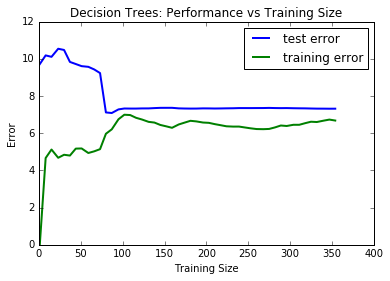

Decision Tree with Max Depth: 
2


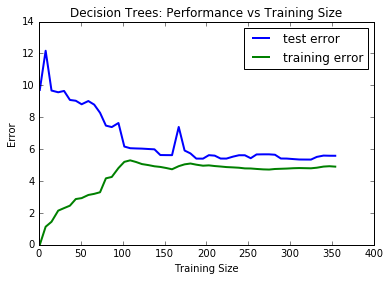

Decision Tree with Max Depth: 
3


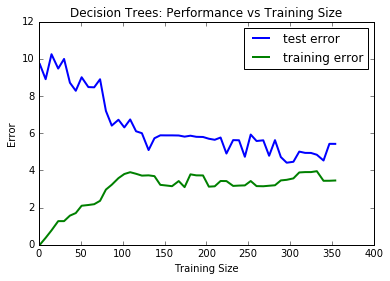

Decision Tree with Max Depth: 
4


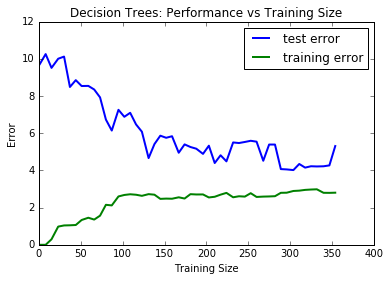

Decision Tree with Max Depth: 
5


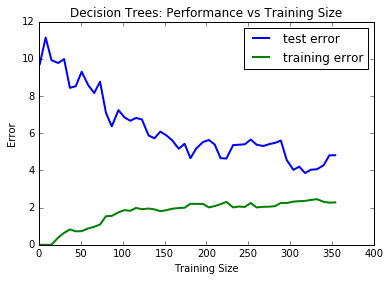

Decision Tree with Max Depth: 
6


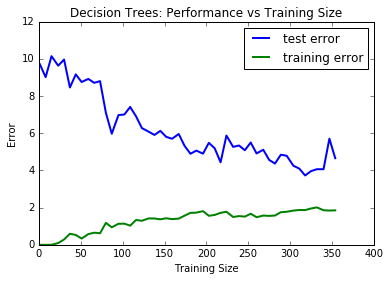

Decision Tree with Max Depth: 
7


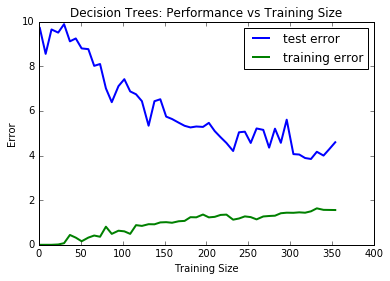

Decision Tree with Max Depth: 
8


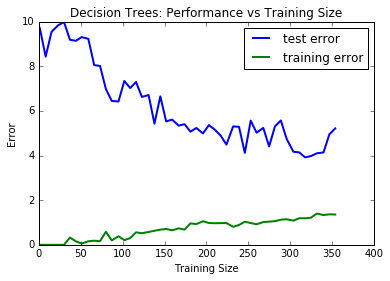

Decision Tree with Max Depth: 
9


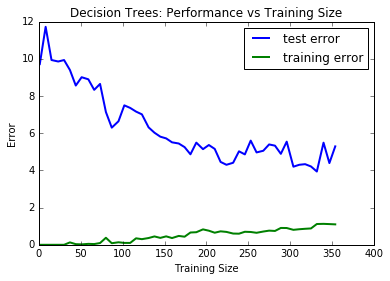

Decision Tree with Max Depth: 
10


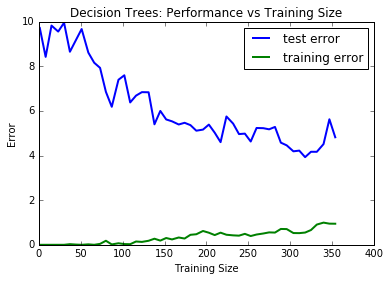

In [12]:
'''Learning Curve Graphs'''

max_depths = [1,2,3,4,5,6,7,8,9,10]
for max_depth in max_depths:
    learning_curve(max_depth, X_train, y_train, X_test, y_test)

In [13]:
"""Calculate the performance of the model as model complexity increases."""

def model_complexity(X_train, y_train, X_test, y_test):
    
    print "Model Complexity: "

    # We will vary the depth of decision trees from 2 to 25
    max_depth = np.arange(1, 25)
    train_err = np.zeros(len(max_depth))
    test_err = np.zeros(len(max_depth))

    for i, d in enumerate(max_depth):
        # Setup a Decision Tree Regressor so that it learns a tree with depth d
        regressor = DecisionTreeRegressor(max_depth=d)

        # Fit the learner to the training data
        regressor.fit(X_train, y_train)

        # Find the performance on the training set
        train_err[i] = performance_metric(y_train, regressor.predict(X_train))

        # Find the performance on the testing set
        test_err[i] = performance_metric(y_test, regressor.predict(X_test))

    # Plot the model complexity graph
    model_complexity_graph(max_depth, train_err, test_err)


In [14]:
"""Plot training and test error as a function of the depth of the decision tree learn."""

def model_complexity_graph(max_depth, train_err, test_err):
    
    pl.figure()
    pl.title('Decision Trees: Performance vs Max Depth')
    pl.plot(max_depth, test_err, lw=2, label = 'test error')
    pl.plot(max_depth, train_err, lw=2, label = 'training error')
    pl.legend()
    pl.xlabel('Max Depth')
    pl.ylabel('Error')
    pl.show()

Model Complexity: 


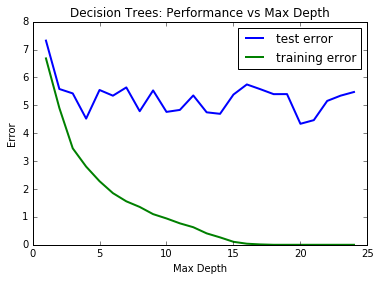

In [15]:
'''Model Complexity Graph'''
model_complexity(X_train, y_train, X_test, y_test)

In [16]:
def fit_predict_model(city_data):
    """Find and tune the optimal model. Make a prediction on housing data."""

    # Get the features and labels from the Boston housing data
    X, y = city_data.data, city_data.target

    # Setup a Decision Tree Regressor
    regressor = DecisionTreeRegressor()

    parameters = {'max_depth':(1,2,3,4,5,6,7,8,9,10)}

    ###################################
    ### Step 4. YOUR CODE GOES HERE ###
    ###################################

    # 1. Find an appropriate performance metric. This should be the same as the
    # one used in your performance_metric procedure above:
    # http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html
    score = metrics.make_scorer(performance_metric, greater_is_better=False)

    # 2. We will use grid search to fine tune the Decision Tree Regressor and
    # obtain the parameters that generate the best training performance. Set up
    # the grid search object here.
    # http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html#sklearn.grid_search.GridSearchCV
    reg = grid_search.GridSearchCV(regressor, parameters, scoring=score, verbose=True)
    
    # Fit the learner to the training data to obtain the best parameter set
    print "Final Model: "
    print reg.fit(X, y)
    
    print "Best Parameters: ", reg.best_params_
    
    # Use the model to predict the output of a particular sample
    x = [11.95, 0.00, 18.100, 0, 0.6590, 5.6090, 90.00, 1.385, 24, 680.0, 20.20, 332.09, 12.13]
    y = reg.predict(x)
    print "House: " + str(x)
    print "Prediction: " + str(y)
    
x = [11.95, 0.00, 18.100, 0, 0.6590, 5.6090, 90.00, 1.385, 24, 680.0, 20.20, 332.09, 12.13] 
X=city_boston.data
from sklearn.neighbors import NearestNeighbors
def find_nearest_neighbor_indexes(x, X):  # x is your vector and X is the data set.
    neigh = NearestNeighbors( n_neighbors = 10 )
    neigh.fit( X)
    distance, indexes = neigh.kneighbors( x )
    return indexes
indexes = find_nearest_neighbor_indexes(x, X)
sum_prices = []
for i in indexes:
    sum_prices.append(city_boston.target[i])
neighbor_avg = np.mean(sum_prices)
print "Nearest Neighbors average: " +str(neighbor_avg)

Nearest Neighbors average: 21.52


In [17]:
'''Tune and predict Model'''
fit_predict_model(city_boston)

Final Model: 
Fitting 3 folds for each of 10 candidates, totalling 30 fits
GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': (1, 2, 3, 4, 5, 6, 7, 8, 9, 10)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(performance_metric, greater_is_better=False),
       verbose=True)
Best Parameters:  {'max_depth': 4}
House: [11.95, 0.0, 18.1, 0, 0.659, 5.609, 90.0, 1.385, 24, 680.0, 20.2, 332.09, 12.13]
Prediction: [ 21.62974359]


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.1s finished
